<a href="https://colab.research.google.com/github/AidaLf/Numerical-Simulation/blob/main/99216036_Aida_Latifi_Hurst_Exponent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [ ]:
def RW(N):
  distance=np.zeros(N)
  for i in range(N):
    r=random.random()
    if r<0.5:
      distance[i]=distance[i-1]-1
    else:
      distance[i]=distance[i-1]+1
  return distance


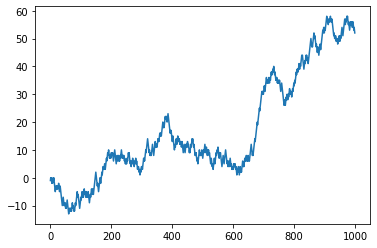

In [ ]:
N=1000
X=RW(N)
plt.plot(X)
plt.show()

In [ ]:
def RS_Ratio(data,n,m):

  #calculating the mean of our data
  M=np.zeros(n)
  for i in range(n):
    X=data[i]
    M[i]=np.mean(X)

  #calculating STD of our chunk
    S=np.zeros(m)
    for t in range(m):
      S[t]=np.std(data[:t+1])

  #Creating a mean centered series by subtracting the mean from the observations
    Y=np.zeros(m)
    for t in range(m):
      Y[t]=X[t]-M[i]

  #Then we calculate the cumulative deviation by summing up the mean centred values
    Z=np.zeros(m)
    for t in range(m):
        Z[t]=np.sum(Y[:t+1])

  #Calculating the Range which is the difference between the maximum value of the cumulative
  #deviation and the minimum value of the cumulative deviation
    R=np.zeros(m)
    for t in range(m):
        R[t]=np.max(Z[:t+1])-np.min(Z[:t+1])
  return (np.mean(R/S))
      





  

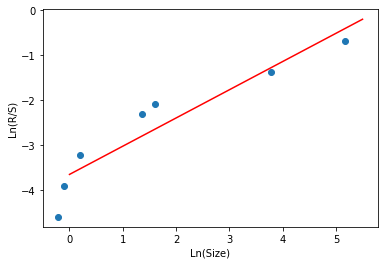

The hurst exponent is:  0.6288220579451179
The fractal dimention is:  1.371177942054882


In [ ]:
#First we divide our data into chunks
size=[2,4,8,10,25,50,100]
chunks=np.empty(len(size))
RS=np.zeros(len(size))
index=0

#Calculating the mean R/S for each size
for i in size:
  arr=np.reshape(X,(i,int(N/i)))
  RS[index]=RS_Ratio(arr,i,int(N/i))
  index+=1

#Plotting the logarithm of R/S and the size of our chunks. 
plt.scatter(np.log(RS),-np.log(size))

#Fitting a line to our plot and calculating the slope of the line fitted to plot
line=linregress(np.log(RS),-np.log(size))
p=np.arange(0,6,0.5)
def Line(x):
  return line.slope*x+line.intercept

plt.plot(p,Line(p), color='Red')
plt.xlabel('Ln(Size)')
plt.ylabel('Ln(R/S)')
plt.show()

#we take H to be hurst exponent and D the dimention of our random walk
H=line.slope
D=2-H
print("The hurst exponent is: ",H)
print("The fractal dimention is: ", D)




We expect the the fractal dimention of a random walk to be 1.5. Given the results we got, it's safe to say this is not a good method for calculating the fractal dimention of a random walk.
Perhaps the mf-dfa (multifractal detrended fluctuation analysis) method would provide us with more accurate result.